In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root_path = os.getcwd().replace('Stats', 'Dataset'+os.sep)
for root,dirs,files in os.walk(root_path):
    if root == root_path:
        datasets = files

In [3]:
datasets = {
    dataset[:dataset.index('.')] : pd.read_csv(root_path + dataset) 
    for dataset in datasets
}

In [4]:
datasets.keys()

dict_keys(['starting-salary', 'noise-level', 'cancer-cases', 'insurance', 'temperature-defects', 'airline-accidents', 'items-lifetime'])

In [5]:
df = datasets['temperature-defects'].copy()

In [6]:
df.head()

,Temperature,Number of Defects
0,24.2,25
1,22.7,31
2,30.5,36
3,28.6,33
4,25.5,19


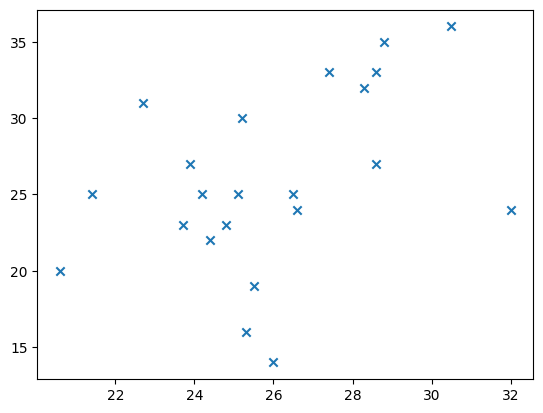

In [7]:
plt.scatter(df['Temperature'], df['Number of Defects'], marker='x')

In [8]:
"""
Sample Correlation Coefficient (R)
- statistic use to quantity the *linear* correlation between two variable

covariance = Summation { (x_i - x_mean) * (y_i - y_mean) }
and we standardised by dividing it with (n-1) * s_x * s_y
"""
def corel(x: np.ndarray, y: np.ndarray):
    n = x.size
    x_m, y_m = np.mean(x), np.mean(y)
    s_x, s_y = np.std(x, ddof=1), np.std(y, ddof=1)
    
    covar = 0
    for xi, yi in zip(x, y):
        covar += (xi-x_m) * (yi-y_m)
    return covar / ((n - 1) * s_x * s_y)

In [9]:
"""
i) -1 <= R <= 1
ii) |R| = 1 means the relation 100% linear and straight line passed through all data value
iii) |R| = 0 means no correlation
iv) sign indicates the either +ve or -ve trend

Therefore, this shows a weak correlation between daily temperature and number of defects
"""
corel(df['Temperature'].values, df['Number of Defects'].values)

0.4189439540499162

In [10]:
x, y = df['Temperature'].values, df['Number of Defects'].values

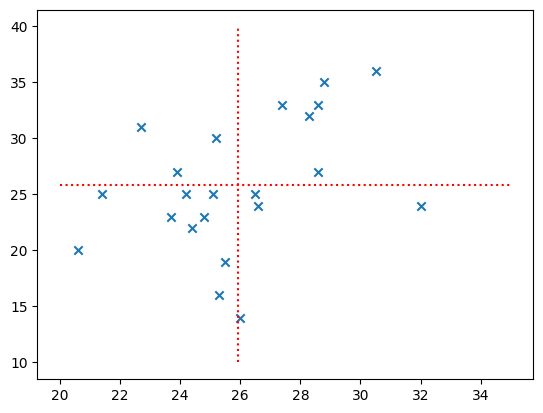

In [11]:
"""
The values in I and III quadrant corresponds +ve values and II and IV quadrant correspond
-ve values and cancels out thus, reducing the R value
"""
plt.scatter(x, y, marker='x')
plt.plot([20,35], [np.mean(y)]*2, 'r:')
plt.plot([np.mean(x)]*2, [10,40], 'r:')

In [12]:
"""
Correlation measures association, not causation
"""

x = np.array([12,16,13,18,19,12,18,19,12,14]) # Years of School
y = np.array([73,67,74,63,73,84,60,62,76,71]) # Pulse rate

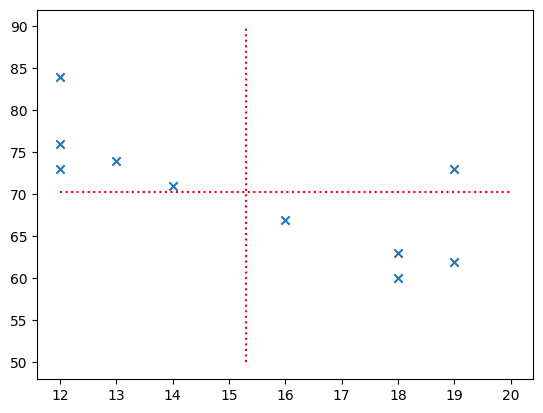

In [13]:
plt.scatter(x, y, marker='x')
plt.plot([12,20], [np.mean(y)]*2, 'r:')
plt.plot([np.mean(x)]*2, [50,90], 'r:')

In [14]:
"""
Correlation of 0.76 indicates a good correlation between years of school and pulse rate

Causation: we can't conclude additional year of school lead to lower pulse rate
Association: we can conclude additional year of school tend to pair with lower pulse rate
"""
abs(corel(x, y))

0.7638032518472291